In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

In [9]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
gdf = pd.read_csv('regssdatacsv.csv')

In [11]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [12]:
HOUdf = gdf[gdf.Tm == 'HOU']
PORdf = gdf[gdf.Tm == 'POR']


In [7]:
HOUdf.Date = HOUdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
HOUdf = HOUdf[(HOUdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (HOUdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

PORdf.Date = PORdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PORdf = PORdf[(PORdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (PORdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

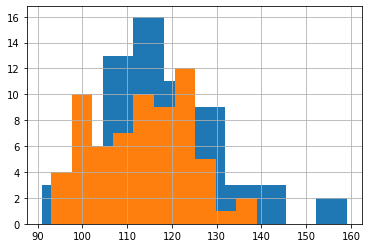

In [13]:
HOUdf.TeamPTS.hist()
PORdf.TeamPTS.hist()

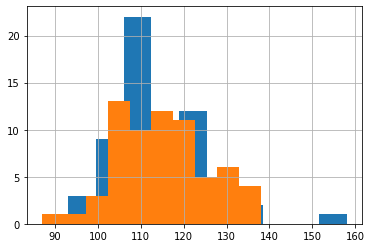

In [14]:
HOUdf.OpponentPTS.hist()
PORdf.OpponentPTS.hist()

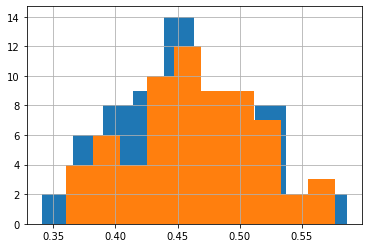

In [15]:
HOUdf.TeamFGP.hist()
PORdf.TeamFGP.hist()

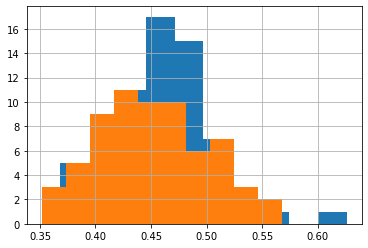

In [16]:
HOUdf.OpponentFGP.hist()
PORdf.OpponentFGP.hist()

In [17]:
HOUmeanpts = HOUdf.TeamPTS.mean()
PORmeanpts = PORdf.TeamPTS.mean()
HOUfgp = HOUdf.TeamFGP.mean()
PORfgp = PORdf.TeamFGP.mean()
HOUsdpts = HOUdf.TeamPTS.std()
PORsdpts = PORdf.TeamPTS.std()

HOUmeaPORp = HOUdf.OpponentPTS.mean()
PORmeaPORp = PORdf.OpponentPTS.mean()
HOUfgpopp = HOUdf.OpponentFGP.mean()
PORfgpopp = PORdf.OpponentFGP.mean()
HOUsdopp = HOUdf.OpponentPTS.std()
PORsdopp = PORdf.OpponentPTS.std()

print("HOU Mean ", HOUmeanpts)
print("HOU FG% ", HOUfgp)
print("HOU Points Standard Deviation ", HOUsdpts)
print("POR Points Mean ", PORmeanpts)
print("POR FG% ", PORfgp)
print("POR Points Standard Deviation ", PORsdpts)

print("HOU OppPoints Mean ", HOUmeaPORp)
print("HOU OppFG% Mean ", HOUfgpopp)
print("HOU OppPoints SD ", HOUsdopp)
print("POR OppPoints Mean ", PORmeaPORp)
print("POR OppFG% Mean ", PORfgpopp)
print("POR OppPoints SD ", PORsdopp)

HOU Mean  118.125
HOU FG%  0.454703125
HOU Points Standard Deviation  13.148118339633845
POR Points Mean  113.63636363636364
POR FG%  0.4623787878787878
POR Points Standard Deviation  10.725435424026616
HOU OppPoints Mean  114.375
HOU OppFG% Mean  0.4629218749999998
HOU OppPoints SD  10.618193431372012
POR OppPoints Mean  115.24242424242425
POR OppFG% Mean  0.4524242424242424
POR OppPoints SD  10.59035934025428


In [18]:
def gameSim():
    HOUScore = (rnd.gauss(HOUmeanpts,HOUsdpts)+ rnd.gauss(PORmeaPORp,PORsdopp))/2
    PORScore = (rnd.gauss(PORmeanpts,PORsdpts)+ rnd.gauss(PORmeaPORp,PORsdopp))/2
    if int(round(HOUScore)) > int(round(PORScore)):
        return 1
    elif int(round(HOUScore)) < int(round(PORScore)):
        return -1
    else: return 0

In [19]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('HOU Win ', team1win/(team1win+team2win),'%')
    print('POR Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [20]:
gAmesSim(10000)

HOU Win  0.5778957227599126 %
POR Win  0.4221042772400874 %


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 